In [1]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
import numpy as np
import matplotlib as plt
df = pd.read_csv('/content/drive/MyDrive/climate.csv',nrows=100000)


#select the specific type
# df= df[df["ELEM"]=="TMAX"]


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
#reshape
reshaped_df = df.set_index(['ID', 'YEAR', 'ELEM', 'MONTH']).unstack(level='MONTH')
reshaped_df.columns = [f'DAY{day}_MONTH{month}' for (day, month) in reshaped_df.columns]
df = reshaped_df.reset_index()


non_existent_days = [
    (2, 29), (2, 30), (2, 31),  # February
    (4, 31), (6, 31), (9, 31), (11, 31)  # Months without 31 days
]

# Iterate over the non-existent days and drop the corresponding columns
for month, day in non_existent_days:
    column_name = f'DAYDAY{day}_MONTH{month}'
    if column_name in df.columns:
        df.drop(column_name, axis=1, inplace=True)

In [3]:
df_output=df.copy()
month_to_number = {
    'MONTH1': 1,
    'MONTH2': 2,
    'MONTH3': 3,
    'MONTH4': 4,
    'MONTH5': 5,
    'MONTH6': 6,
    'MONTH7': 7,
    'MONTH8': 8,
    'MONTH9': 9,
    'MONTH10': 10,
    'MONTH11': 11,
    'MONTH12': 12,
}
column_rename_mapping = {}
for col in df_output.columns:
    if col.startswith('DAYDAY') and 'MONTH' in col:
        day = int(col.split('_')[0].replace('DAYDAY', ''))
        month_name = col.split('_')[1]
        month_value = month_to_number.get(month_name, 0)
        date_value = day + (month_value-1) * 31
        column_rename_mapping[col] = str(date_value)+"Day"

# Rename the columns using the dictionary
df_output.rename(columns=column_rename_mapping, inplace=True)

fliped_column_rename_mapping = {v: k for k, v in column_rename_mapping.items()}

#simplify to the form D{day_number}_M{month_number}
simplified_dict = {}

for key, value in fliped_column_rename_mapping.items():
    # Extract day and month numbers
    day_number = int(value.split('DAYDAY')[1].split('_')[0])
    month_number = int(value.split('_MONTH')[1])
    simplified_value = f'D{day_number}_M{month_number}'
    simplified_dict[key] = simplified_value


In [4]:
cols = sorted(df_output.columns.tolist()[3:])
def extract_number(element):
    return int(''.join(filter(str.isdigit, element)))

# Sort the list using the custom key function
cols = sorted(cols, key=extract_number)
cols=['ID',
 'YEAR',
 'ELEM']+cols
df_output=df_output[cols]
df_output.rename(columns=simplified_dict, inplace=True)

In [5]:
##SORTED DF
df_output

,ID,YEAR,ELEM,D1_M1,D2_M1,D3_M1,D4_M1,D5_M1,D6_M1,D7_M1,...,D22_M12,D23_M12,D24_M12,D25_M12,D26_M12,D27_M12,D28_M12,D29_M12,D30_M12,D31_M12
0,USC00010160,1970,PRCP,13.0,0.0,0.0,0.0,0.0,267.0,51.0,...,0.0,0.0,246.0,0.0,0.0,0.0,0.0,345.0,41.0,64.0
1,USC00010160,1970,SNOW,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,USC00010160,1970,SNWD,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,USC00010160,1970,TMAX,39.0,72.0,122.0,61.0,106.0,100.0,44.0,...,183.0,228.0,211.0,128.0,78.0,44.0,117.0,117.0,83.0,94.0
4,USC00010160,1970,TMIN,11.0,-61.0,-39.0,-67.0,-50.0,-6.0,-111.0,...,83.0,139.0,17.0,-33.0,-67.0,-83.0,-56.0,-11.0,6.0,17.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10042,USC00015635,1979,TMAX,167.0,6.0,-6.0,44.0,33.0,50.0,144.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10043,USC00015635,1979,TMIN,0.0,-100.0,-122.0,-78.0,-6.0,11.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10044,USC00015635,1979,TOBS,6.0,-94.0,-39.0,11.0,22.0,50.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10045,USC00015635,1979,WT03,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
##ADD A EMPLTY STATION TO TEST
# new_row = pd.Series([None] * (len(df.columns) - 1), index=df.columns[1:])
# new_row['ID'] = 'sdjgsj1'

# # Append the new row to the original DataFrame
# df = df.append(new_row, ignore_index=True)

In [7]:
#####STATION FREQUENCY
df['ALL_MISSING'] = df.drop(['ID', 'YEAR', 'ELEM'], axis=1).isna().all(axis=1).astype(int)
df['REV_ALL_MISSING'] = 1-df.drop(['ID', 'YEAR', 'ELEM',"ALL_MISSING"], axis=1).isna().all(axis=1).astype(int)

#number of stations that are missing
ID_df = df[['REV_ALL_MISSING', 'ID']]
ID_df = ID_df.groupby('ID')['REV_ALL_MISSING'].sum().reset_index()
count = len(ID_df[ID_df['REV_ALL_MISSING'] >= 1])
print("Total number of stations ", len(ID_df))
print("Number of stations that are not missing: ", count)

Total number of stations  31
Number of stations that are not missing:  31


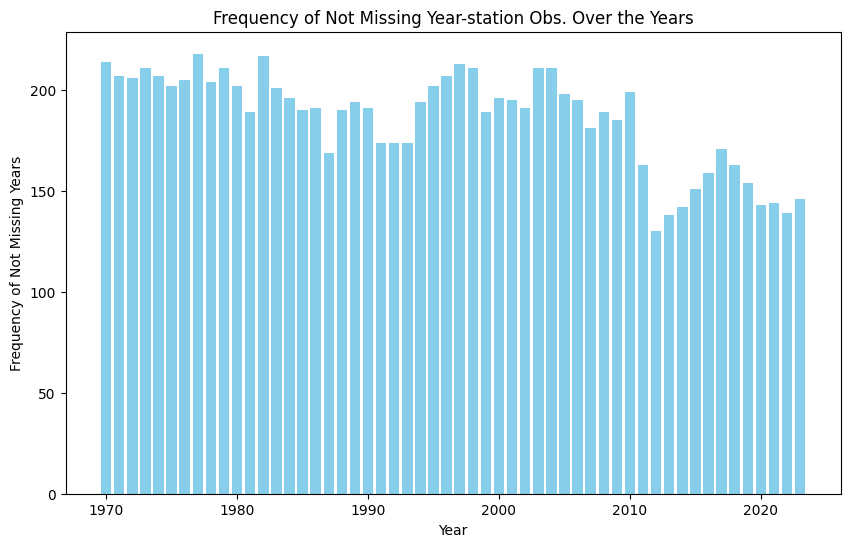

In [8]:
#####YEAR FREQUENCY
import matplotlib.pyplot as plt
yearly_counts = df.groupby('YEAR')['REV_ALL_MISSING'].sum()

plt.figure(figsize=(10, 6))
plt.bar(yearly_counts.index, yearly_counts.values, color='skyblue')
plt.xlabel('Year')
plt.ylabel('Frequency of Not Missing Years')
plt.title('Frequency of Not Missing Year-station Obs. Over the Years')
plt.show()


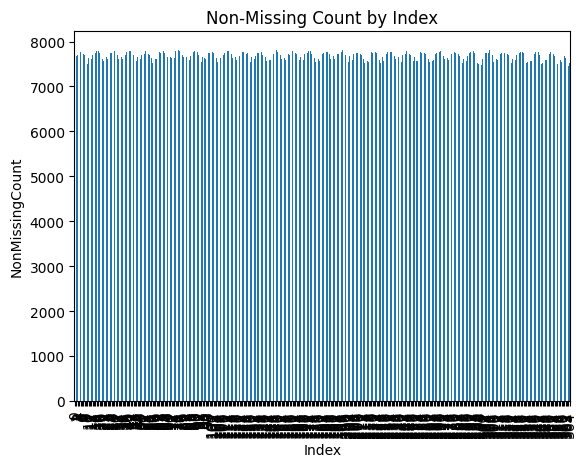

In [9]:
#####DAY FREQUENCY
# Create a dictionary to map the old column names to the new column names
month_to_number = {
    'MONTH1': 1,
    'MONTH2': 2,
    'MONTH3': 3,
    'MONTH4': 4,
    'MONTH5': 5,
    'MONTH6': 6,
    'MONTH7': 7,
    'MONTH8': 8,
    'MONTH9': 9,
    'MONTH10': 10,
    'MONTH11': 11,
    'MONTH12': 12,
}

column_rename_mapping = {}
for col in df.columns:
    if col.startswith('DAYDAY') and 'MONTH' in col:
        day = int(col.split('_')[0].replace('DAYDAY', ''))
        month_name = col.split('_')[1]
        month_value = month_to_number.get(month_name, 0)
        date_value = day + (month_value-1) * 31
        column_rename_mapping[col] = date_value

# Rename the columns using the dictionary
df.rename(columns=column_rename_mapping, inplace=True)



# get missing for years
df_day= df.drop(columns=["ID", "YEAR", "ELEM", "ALL_MISSING", "REV_ALL_MISSING"]).transpose()
df_day['NonMissingCount'] = df_day.count(axis=1)
df_day = df_day.reset_index()
df_day=df_day.drop("index",axis=1)


#plot
df_day['NonMissingCount'].plot(kind='bar', legend=False)
plt.xlabel('Index')
plt.ylabel('NonMissingCount')
plt.title('Non-Missing Count by Index')
plt.show()




UNFOLDING TENSOR

In [10]:
#Choose a ELEM Type
# df_output=df_output.drop("D29_M2", axis=1, inplace=True)
df_output

,ID,YEAR,ELEM,D1_M1,D2_M1,D3_M1,D4_M1,D5_M1,D6_M1,D7_M1,...,D22_M12,D23_M12,D24_M12,D25_M12,D26_M12,D27_M12,D28_M12,D29_M12,D30_M12,D31_M12
0,USC00010160,1970,PRCP,13.0,0.0,0.0,0.0,0.0,267.0,51.0,...,0.0,0.0,246.0,0.0,0.0,0.0,0.0,345.0,41.0,64.0
1,USC00010160,1970,SNOW,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,USC00010160,1970,SNWD,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,USC00010160,1970,TMAX,39.0,72.0,122.0,61.0,106.0,100.0,44.0,...,183.0,228.0,211.0,128.0,78.0,44.0,117.0,117.0,83.0,94.0
4,USC00010160,1970,TMIN,11.0,-61.0,-39.0,-67.0,-50.0,-6.0,-111.0,...,83.0,139.0,17.0,-33.0,-67.0,-83.0,-56.0,-11.0,6.0,17.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10042,USC00015635,1979,TMAX,167.0,6.0,-6.0,44.0,33.0,50.0,144.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10043,USC00015635,1979,TMIN,0.0,-100.0,-122.0,-78.0,-6.0,11.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10044,USC00015635,1979,TOBS,6.0,-94.0,-39.0,11.0,22.0,50.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10045,USC00015635,1979,WT03,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
# C1 of dimension (# of stations) x (# days + # of years + # of elements).
C1=df_output.copy()
melted_df = pd.melt(C1, id_vars=['ID', 'YEAR', 'ELEM'], var_name='variable', value_name='value')
melted_df['Index'] = melted_df['ELEM']+ '_Y' + melted_df['YEAR'].astype(str) + '_' + melted_df['variable']
C1 = melted_df.pivot(index=['ID'], columns='Index', values='value').reset_index()

C1.set_index('ID', inplace=True)

In [12]:
#C2 of dimensions (# of years) x (# of stations + # of days + # of elements).
C2=df_output.copy()
melted_df = pd.melt(C2, id_vars=['ID', 'YEAR', 'ELEM'], var_name='variable', value_name='value')
melted_df['Index'] = melted_df['ELEM']+"_ID_"+melted_df['ID'].astype(str) + '_' + melted_df['variable']
C2 = melted_df.pivot(index=['YEAR'], columns='Index', values='value').reset_index()



In [13]:
# C3 of dimension (# of days) x (# of years + # of stations + # of elements).
C3=df_output.copy()
C3["ID_YEAR"]=C3["ELEM"]+ "_" + C3["ID"]+"_Y"+C3["YEAR"].astype(str)
C3 = C3.drop(['ID', 'YEAR',"ELEM"], axis=1)
C3=C3.transpose()
C3 = C3.set_axis(C3.iloc[-1], axis=1, inplace=False).iloc[:-1]


<ipython-input-13-4e1c43b0c3f9>:6: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  C3 = C3.set_axis(C3.iloc[-1], axis=1, inplace=False).iloc[:-1]


In [14]:
#C4 of dimension (# of elements) x (# of years + # of stations + # of days).
C4=df_output.copy()
melted_df = pd.melt(C4, id_vars=['ID', 'YEAR', 'ELEM'], var_name='variable', value_name='value')
melted_df['Index'] = melted_df['ID']+ '_Y' + melted_df['YEAR'].astype(str) + '_' + melted_df['variable']
C4 = melted_df.pivot(index=['ELEM'], columns='Index', values='value').reset_index()




In [15]:
dataframes = [C1, C2, C3, C4]
for i, df in enumerate(dataframes, start=1):
    print(f"Dimensions of C{i}: {df.shape}")

dataframes_cleaned = [df.dropna(axis=1) for df in dataframes]

for i, df in enumerate(dataframes_cleaned, start=1):
    print(f"Dimensions of C{i} after removing NaN: {df.shape}")

Dimensions of C1: (31, 373761)
Dimensions of C2: (54, 147096)
Dimensions of C3: (365, 10047)
Dimensions of C4: (30, 566116)
Dimensions of C1 after removing NaN: (31, 2637)
Dimensions of C2 after removing NaN: (54, 4025)
Dimensions of C3 after removing NaN: (365, 3725)
Dimensions of C4 after removing NaN: (30, 1)


In [17]:
C1

Index,ID,DAEV_Y1970_D10_M1,DAEV_Y1970_D10_M10,DAEV_Y1970_D10_M11,DAEV_Y1970_D10_M12,DAEV_Y1970_D10_M2,DAEV_Y1970_D10_M3,DAEV_Y1970_D10_M4,DAEV_Y1970_D10_M5,DAEV_Y1970_D10_M6,...,WT14_Y1978_D9_M11,WT14_Y1978_D9_M12,WT14_Y1978_D9_M2,WT14_Y1978_D9_M3,WT14_Y1978_D9_M4,WT14_Y1978_D9_M5,WT14_Y1978_D9_M6,WT14_Y1978_D9_M7,WT14_Y1978_D9_M8,WT14_Y1978_D9_M9
0,USC00010160,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,USC00010178,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,USC00010505,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,USC00010583,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,USC00010655,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,USC00010823,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,USC00010957,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,USC00011288,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,USC00011620,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,USC00011694,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
import numpy as np
covariance_matrix = np.cov(C1, rowvar=False)

In [ ]:
covariance_matrix

In [ ]:
eigenvalues, eigenvectors = np.linalg.eigh(covariance_matrix)

(31, 2)